In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './..')

In [2]:
from importlib import reload

import numpy as np
import tensorflow as tf
import logging
from scipy import linalg

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1 import make_axes_locatable

import dev_ori_sel_RF
from dev_ori_sel_RF import data_dir,integrator_tf,dynamics,network,run_onelayer,probe_RFs
from dev_ori_sel_RF.tools import misc,update_params_dict,analysis_tools

2023-04-10 11:21:53.787519: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Please install GPU version of TF


2023-04-10 11:22:00.207304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
reload(misc)

config_dict = misc.load_external_params("params_test")

N4 = config_dict["N4"]
Nlgn = config_dict["Nlgn"]
Nret = config_dict["Nret"]
Nlgnpop = 2
N4pop = config_dict["num_lgn_paths"] // Nlgnpop

MISC params_dict params_test {'Nret': 20, 'Nlgn': 20, 'N4': 20, 'N23': 1, 'Nvert': 1, 'runtime': 4000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.07, 'sigma2': 0.2, 'ampl1': 1.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.045, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity': 0.6, 'SD_eccentricity': 0

In [4]:
# reload(run_onelayer)
# reload(integrator_tf)
# Version = 0
# run_onelayer.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

Please install GPU version of TF
# of stimuli: 16
mode in get_RFs initialize
CHECK radius 0.15
CHECK radius 0.15
mode in get_RFs initialize
CHECK radius 0.15
CHECK radius 0.15
profile_conn Gaussian
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)

CHECK CONN VALS Gaussian 0.16206370216865573 0.1634853135911878 0.2004777735523877 0.7074948371359112
orig max ew 2.977428066551318 0.95
max_ew 0.95
WEE=3.6373674721700744,WEI=3.1906732212018207,WIE=3.6692742043820923,WII=3.19067322120182
omega_i=Wie-Wee=0.031906732212017896
omega_e=Wii-Wei=-8.881784197001252e-16

W4to4 (800, 800)
constraint_vec (2398, 23200)
Starting simulation. This might take a while...
...
max_freq 4.2 0.23809523809523808 1.4959965017094252
self.weight_strength 1.0
self.weight_strength 1.0
Number of plasticity steps: 32
lgn (4, 400) tf.Tensor(4.525697, shape=(), dtype=float32)

Plasticity step: 0, exp: 0, input: 

H1 (2, 400)
lgn (4, 400) tf.Tensor(4.9071965, shape=(), dtype=float32)

Plasticity step: 25, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 25 49.08133 71.73734 0 0
key dW_lgn_e 25 0.9670793 2.202253
key dW_lgn_i 25 1.0883276 2.147792
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.315908, shape=(), dtype=float32)

Plasticity step: 26, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 26 48.238594 76.23635 0 0
key dW_lgn_e 26 0.98985296 2.3122044
key dW_lgn_i 26 1.1224409 2.2069852
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.848301, shape=(), dtype=float32)

Plasticity step: 27, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 27 53.295288 68.69847 0 0
key dW_lgn_e 27 1.0392228 2.1015005
key dW_lgn_i 27 1.1298735 2.0782204
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.2804503, shape=(), dtype=float32)

Plasticity step: 28, exp: 0, input: 0
Comment out 

In [7]:
# config_dict = misc.load_external_params("params_test")

# config_dict["Wlgn_to4_params"].update({
#     "W_mode": "load_from_external",
#     "load_from_prev_run" : 0})

# reload(run_onelayer)
# reload(integrator_tf)
# Version = 1
# run_onelayer.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

MISC params_dict params_test {'Nret': 20, 'Nlgn': 20, 'N4': 20, 'N23': 1, 'Nvert': 1, 'runtime': 4000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.07, 'sigma2': 0.2, 'ampl1': 1.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.045, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity': 0.6, 'SD_eccentricity': 0

H1 (2, 400)
lgn (4, 400) tf.Tensor(5.4381933, shape=(), dtype=float32)

Plasticity step: 12, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 12 51.09475 70.516495 0 0
key dW_lgn_e 12 0.9311738 2.1789494
key dW_lgn_i 12 1.0415082 2.1397147
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.0029883, shape=(), dtype=float32)

Plasticity step: 13, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 13 46.75965 72.9737 0 0
key dW_lgn_e 13 0.8783631 2.2148678
key dW_lgn_i 13 1.0161465 2.136609
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.4875584, shape=(), dtype=float32)

Plasticity step: 14, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 14 54.565014 66.41964 0 0
key dW_lgn_e 14 1.07909 2.0439608
key dW_lgn_i 14 1.1712472 2.031831
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.3525486, shape=(), dtype=float32)

Plasticity step: 15, exp: 0, input: 0
Comment out ne

In [55]:
def imshowbar(ax,A,**kwargs):
    ax.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    plot = ax.imshow(A,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(plot, cax=cax, orientation='vertical')
    
def contourbar(ax,A,**kwargs):
    ax.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    plot = ax.contour(A,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(plot, cax=cax, orientation='vertical')
    
def doubcontbar(ax,A1,A2,**kwargs):
    ax.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    plot1 = ax.contour(A1,**kwargs)
    plot2 = ax.contour(A2,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(plot1, cax=cax, orientation='vertical')

In [198]:
Version = 15

['W', 'l4']
(2, 2, 20, 20, 20, 20)
(2, 20, 20)
(400, 400)


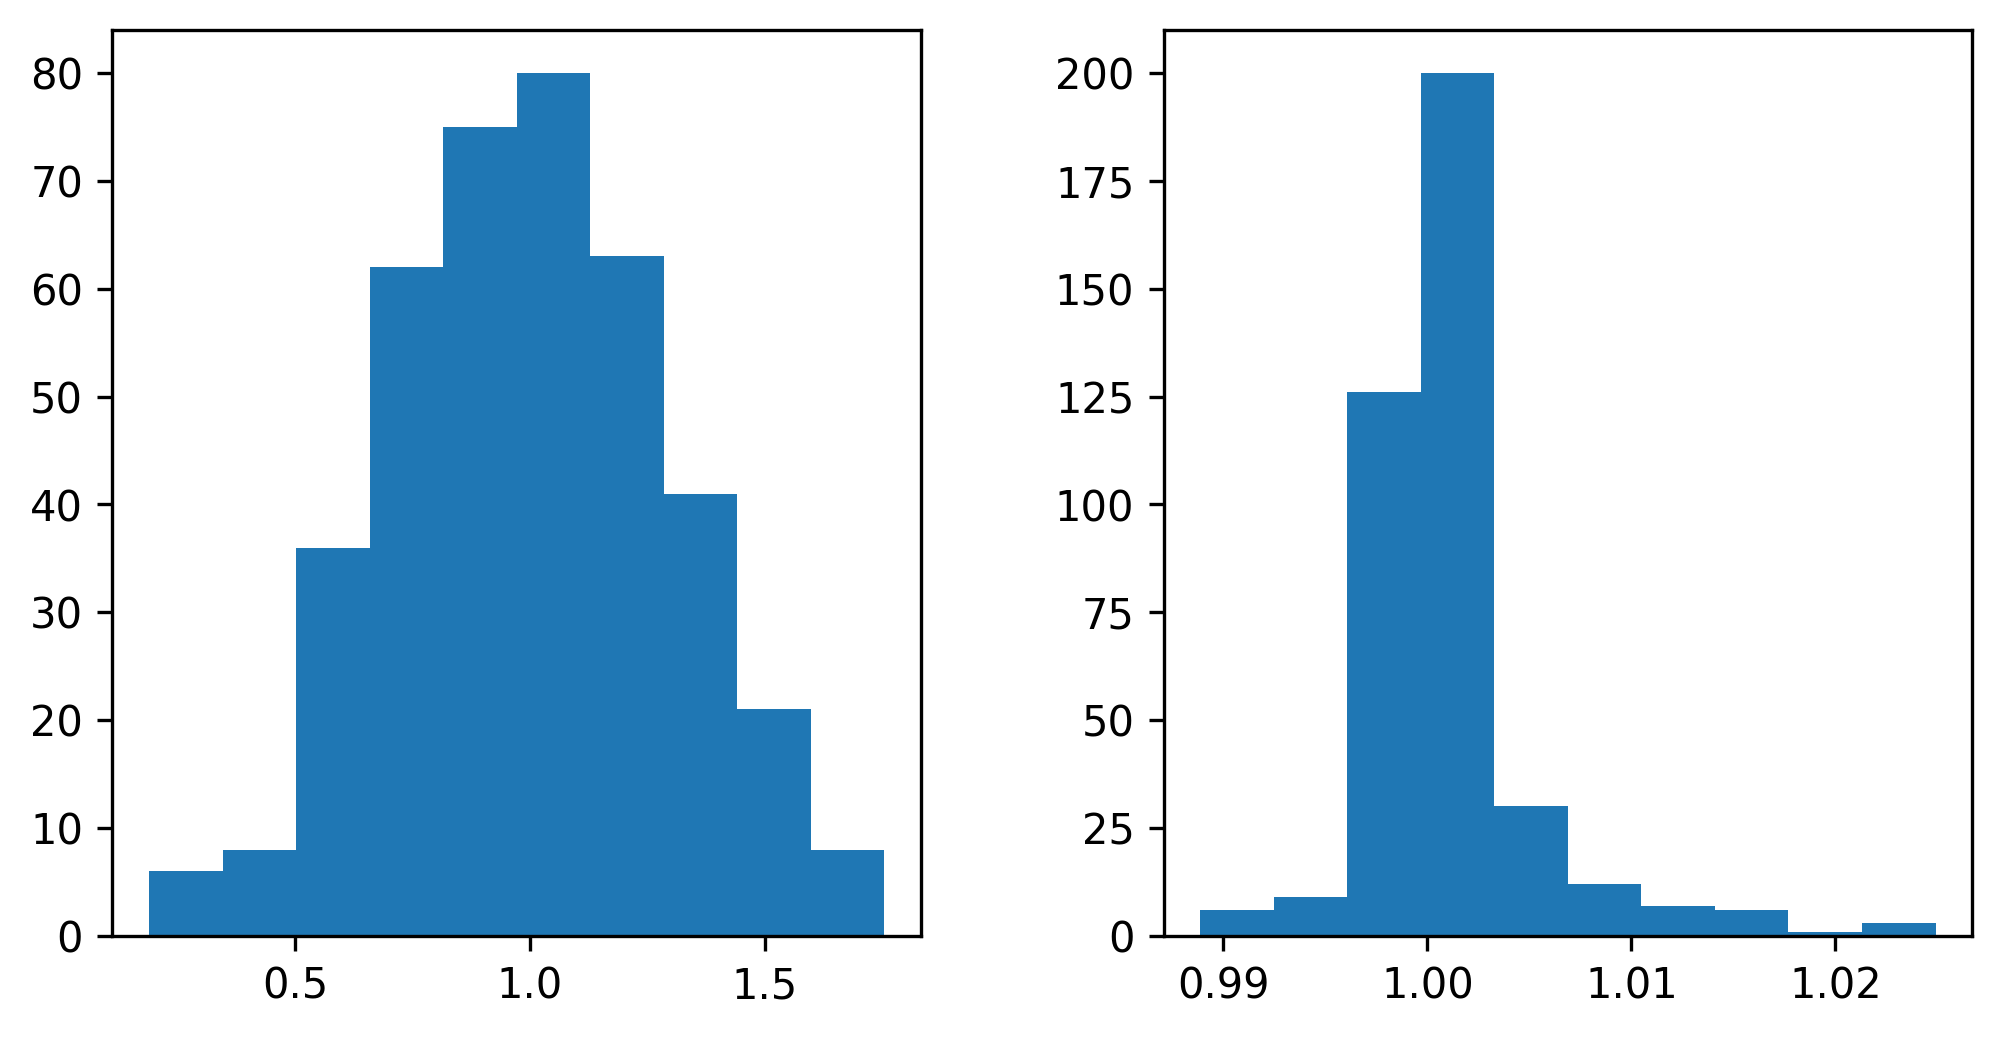

In [199]:
with np.load(data_dir+'/layer4/v{v}/y_v{v}.npz'.format(v=Version)) as data:
    print(list(data.keys()))
    print(data['W'].reshape(N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4).shape)
    print(data['l4'].reshape(N4pop,N4,N4).shape)
    print(data['W'].reshape(N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4)[0,0].reshape(400,400).shape)
    
    fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
    fig.subplots_adjust(hspace = .1, wspace=.3)
    
    axs[0].hist(data['W'].reshape(N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4)[0,0].reshape(400,400).sum(-1))
    axs[1].hist(data['W'].reshape(N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4)[0,0].reshape(400,400).sum(0))

['W', 'l4']
(2, 2, 20, 20, 20, 20)
(2, 20, 20)


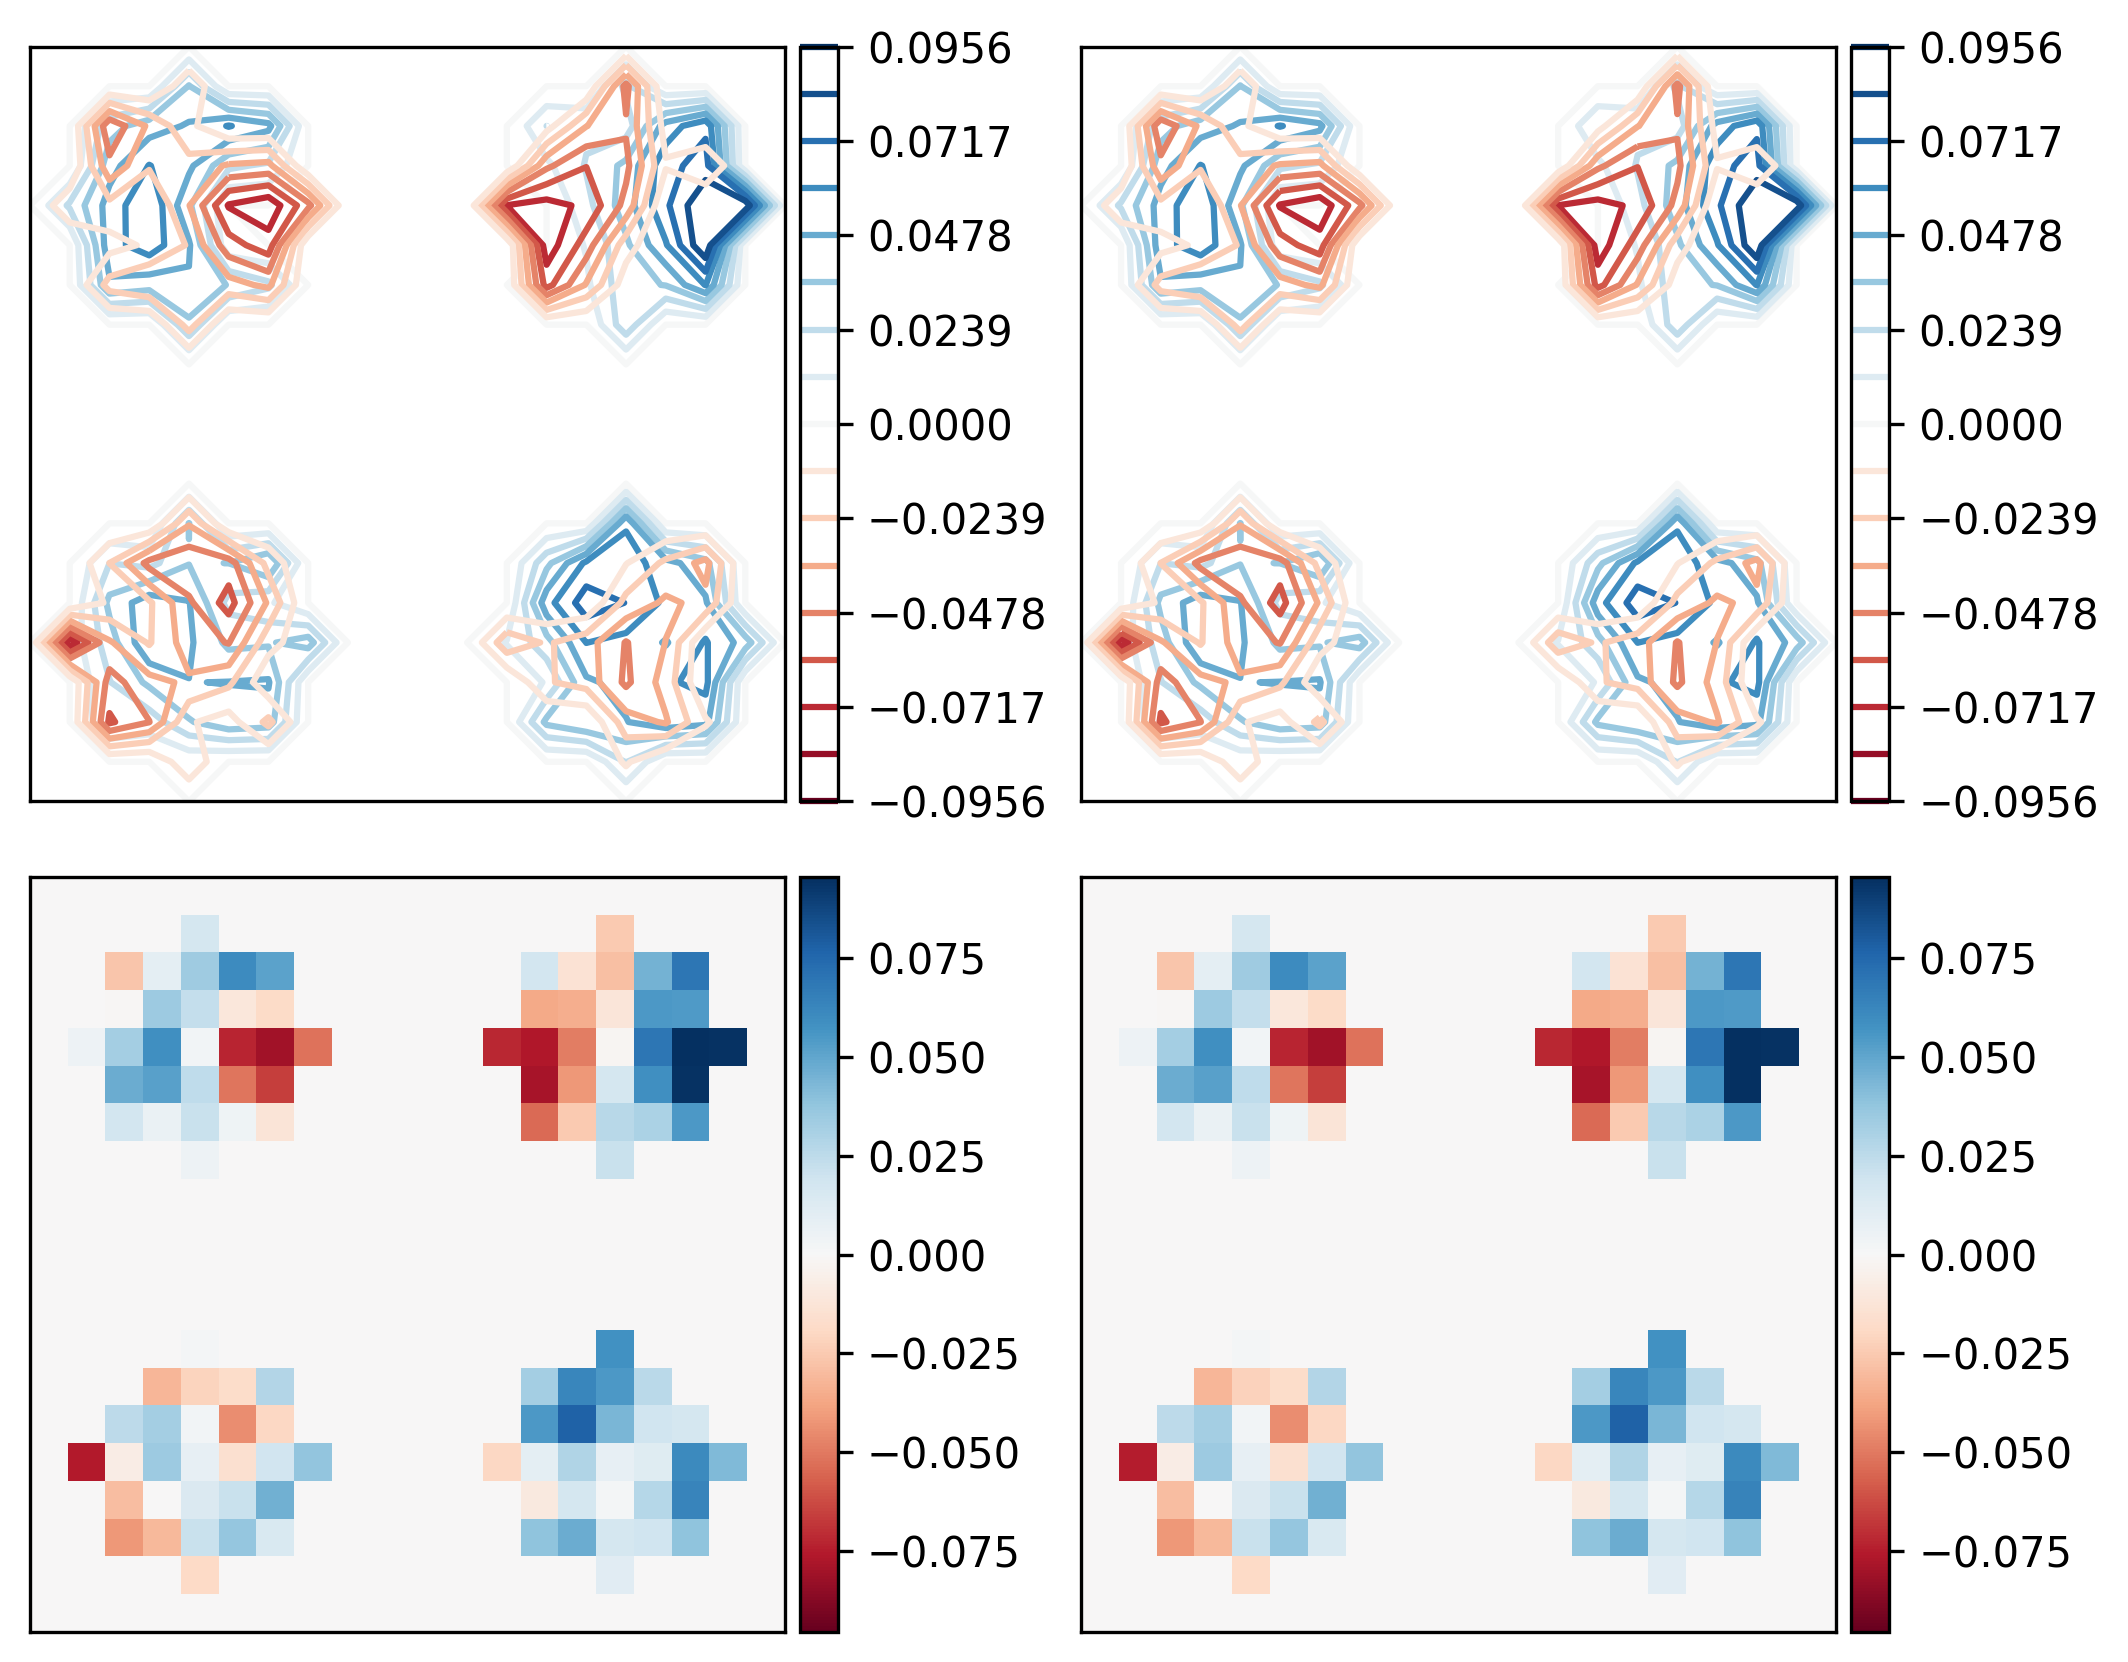

In [200]:
with np.load(data_dir+'/layer4/v{v}/y_v{v}.npz'.format(v=Version)) as data:
    print(list(data.keys()))
    print(data['W'].reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn).shape)
    print(data['l4'].reshape(N4pop,N4,N4).shape)
    wff = data['W'].reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[:,:,[4,-5],:,:,:][:,:,:,[4,-5],:,:]
    rf = np.sum(wff[:,0]-wff[:,1],axis=(-4,-3))

fig,axs = plt.subplots(2,2,figsize=(8,7),dpi=300)
fig.subplots_adjust(hspace = .1, wspace=.3)
for i in range(2):
    doubcontbar(axs[0,i],np.sum(wff[i,0],axis=(-4,-3)),-np.sum(wff[i,1],axis=(-4,-3)),
                cmap='RdBu',levels=np.linspace(-np.max(np.abs(wff[i])),np.max(np.abs(wff[i])),17))

for i in range(2):
    imshowbar(axs[1,i],rf[i],cmap='RdBu',vmin=-np.max(np.abs(rf[i])),vmax=np.max(np.abs(rf[i])))

In [156]:
reload(probe_RFs)

net,act,phase = probe_RFs.probe_RFs_one_layer(Version)

mode in get_RFs load_from_external
 
Load ff connection from version 15
 
profile_conn Gaussian
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)

CHECK CONN VALS Gaussian 0.16206370216865573 0.1634853135911878 0.2004777735523877 0.7074948371359112
orig max ew 2.977428066551318 0.95
max_ew 0.95
WEE=3.6373674721700744,WEI=3.1906732212018207,WIE=3.6692742043820923,WII=3.19067322120182
omega_i=Wie-Wee=0.031906732212017896
omega_e=Wii-Wei=-8.881784197001252e-16

mode in generate_inputs moving_grating_online
lgn (2, 1200, 1, 4, 10)
(2, 3, 400, 4, 10)
(2, 400, 4, 10, 3)
(2, 400, 4, 3, 10)
(2, 400, 3, 4, 10)
Wlgn_to_4 (4, 400, 400) (2, 400, 3, 4, 10)
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.2888585245496587 1.2888585245496587
pref_phase 1.2888585245496587 1.2888585245496587
Spat frequency=40, orientation=0 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.0 40
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 2.5777170490993173 2.5777170490993173
pref_phase 2.5777170490993173 2.5777170490993173
Spat frequency=40, orientation=45 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.7853981633974483 40
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.933287786824488 1.933287786824488
pref_phase 1.933287786824488 1.933287786824488
Spat frequency=40, orientation=90 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 1.5707963267948966 40
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 3.866575573648976 3.866575573648976
pref_phase 3.866575573648976 3.866575573648976
Spat frequency=40, orientation=135 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 2.356194490192345 40
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 0.6444292622748293 0.6444292622748293
pref_phase 0.6444292622748293 0.6444292622748293
Spat frequency=60, orientation=0 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.0 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.933287786824488 1.933287786824488
pref_phase 1.933287786824488 1.933287786824488
Spat frequency=60, orientation=45 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.7853981633974483 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 0.6444292622748293 0.6444292622748293
pref_phase 0.6444292622748293 0.6444292622748293
Spat frequency=60, orientation=90 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 1.5707963267948966 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 2.5777170490993173 2.5777170490993173
pref_phase 2.5777170490993173 2.5777170490993173
Spat frequency=60, orientation=135 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 2.356194490192345 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.933287786824488 1.933287786824488
pref_phase 1.933287786824488 1.933287786824488
Spat frequency=80, orientation=0 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.0 80
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 4.5110048359238055 4.5110048359238055
pref_phase 4.5110048359238055 4.5110048359238055
Spat frequency=80, orientation=45 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.7853981633974483 80
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 5.155434098198635 5.155434098198635
pref_phase 5.155434098198635 5.155434098198635
Spat frequency=80, orientation=90 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 1.5707963267948966 80
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 0.6444292622748293 0.6444292622748293
pref_phase 0.6444292622748293 0.6444292622748293
Spat frequency=80, orientation=135 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 2.356194490192345 80


mode in get_RFs load_from_external
 
Load ff connection from version 0
 
profile_conn Gaussian
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)

CHECK CONN VALS Gaussian 0.16206370216865573 0.1634853135911878 0.2004777735523877 0.7074948371359112
orig max ew 2.977428066551318 0.95
max_ew 0.95
WEE=3.6373674721700744,WEI=3.1906732212018207,WIE=3.6692742043820923,WII=3.19067322120182
omega_i=Wie-Wee=0.031906732212017896
omega_e=Wii-Wei=-8.881784197001252e-16

mode in get_RFs load_from_external
 
Load ff connection from version 3
 
profile_conn Gaussian
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)

CHECK CONN VALS Gaussian 0.16206370216865573 0.1634853135911878 0.2004777735523877 0.7074948371359112
orig max ew 2.977428066551318 0.95
max_ew 0.95
WEE=3.6373674721700744,

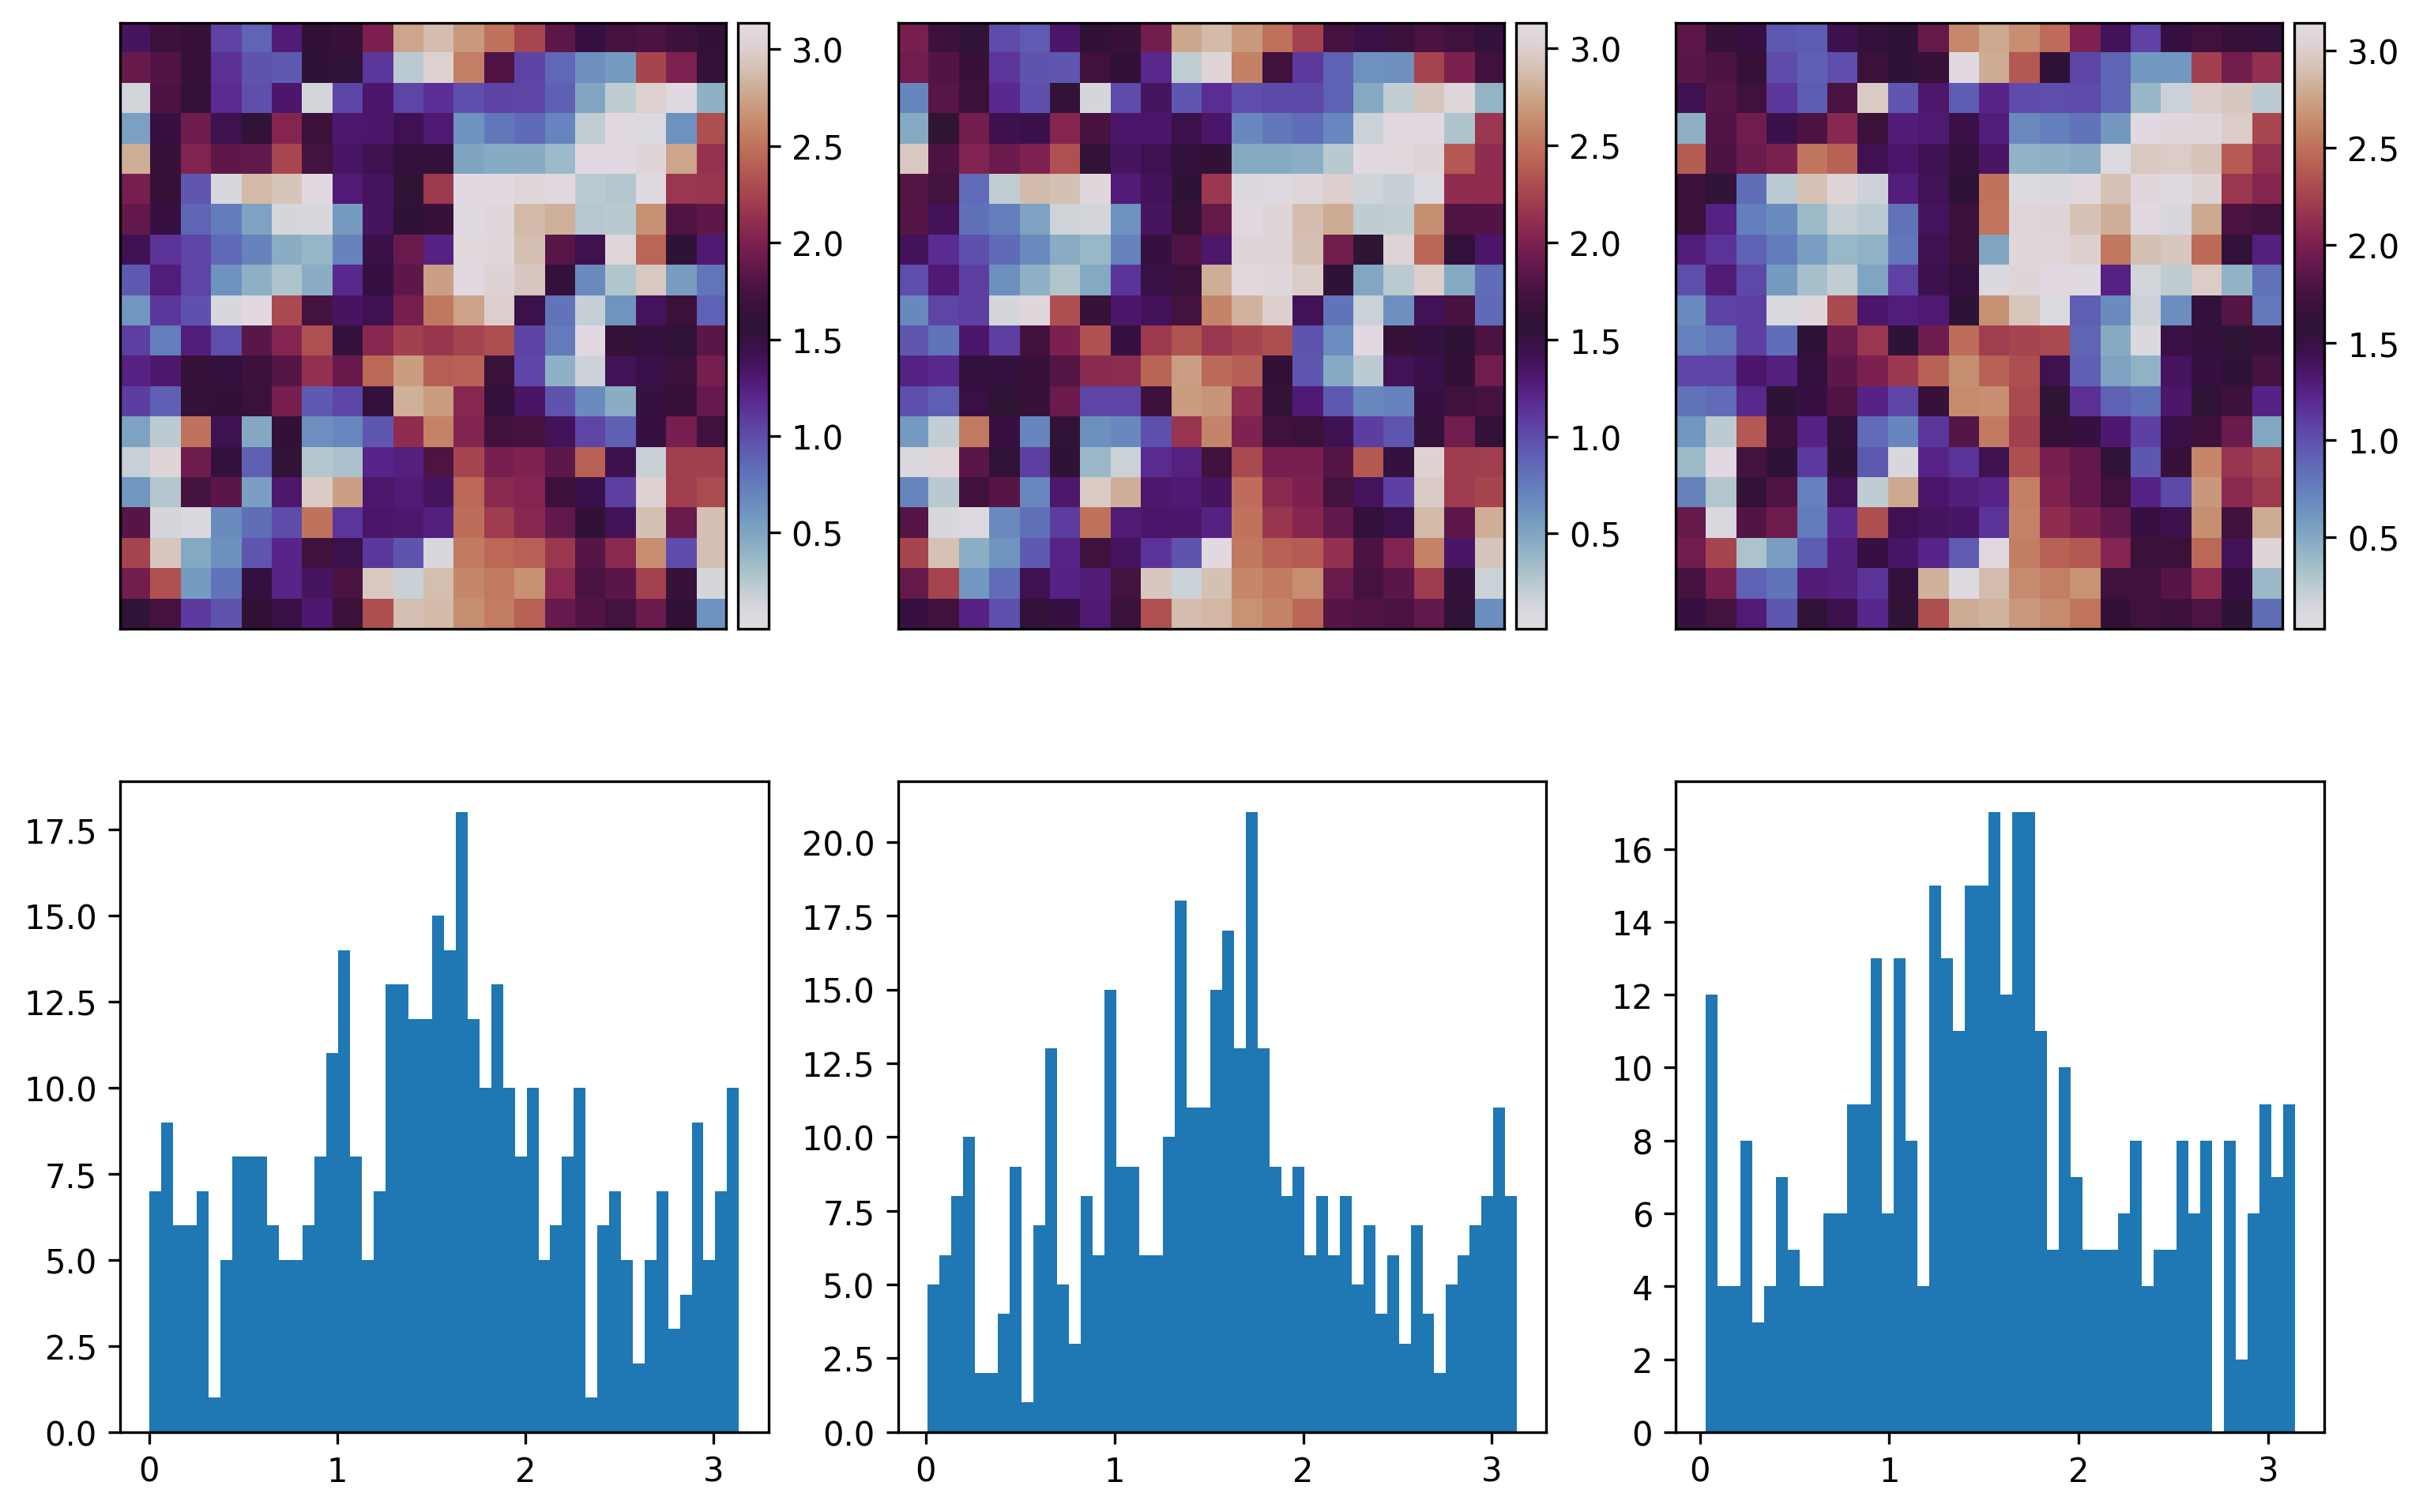

In [203]:
Vers = [0,3,15]

fig,axs = plt.subplots(2,len(Vers),figsize=(4*len(Vers),8),dpi=300)

for i,Version in enumerate(Vers):
    load_location = 'local'
    load_path = data_dir + "layer4/v{v}/".format(v=Version)
    probe_config_dict = pickle.load(open(load_path + "config_v{v}.p".format(v=Version),"rb"))
    probe_config_dict["Wlgn_to4_params"].update({
        "W_mode": "load_from_external",
        "load_from_prev_run" : Version})
    net = network.Network(Version,probe_config_dict,load_location=load_location)#,ampl_het=0.,spatial_freq_het=0.

    _,Wlgn_to_4,arbor_on,arbor_off,arbor2,_,W4to4 = net.system
    Wlgn_to_4 = Wlgn_to_4.reshape((2,2,400,400))

    sd = Wlgn_to_4[:,0,...] - Wlgn_to_4[:,1,...]
    sd = sd.reshape((2,20,20,20,20))
    rA = int(config_dict["Wlgn_to4_params"]["r_A_on"] * N4)
    DA = 2*rA + 5
    opm,Rn = analysis_tools.get_response(sd[0],DA)
    opm = np.angle(opm)/2
    opm = opm - (np.sign(opm)-1)*0.5*np.pi
    
    imshowbar(axs[0,i],opm,cmap='twilight')
    axs[1,i].hist(opm.flatten(),50)